# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
#don't use this one bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename, header=0) # YOUR CODE HERE

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. Airbnb NYC "listings" data set
2. Will be predicting the review score of a listing. The label is review_scores_rating.
3. This is a supervised learning & multi-class regression problem.
4. My features are the rest of the columns in the data minus the other review related columns
5. This is an important problem because, in the eyes of the company, the overall score of the reviews can determine if the listing is a good listing or not. If not, the company can review the reviews in detail through what they're saying in order to troubleshoot the problem of the listing and make sure that listing on the platform follows guidelines and rules. Proactive quality control is a core value that a platform like Airbnb should be actively aiming to achieve.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
print(df.shape)
print(list(df.columns))
df['review_scores_rating'].head(10)

(28022, 50)
['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entir

0    4.70
1    4.45
2    5.00
3    4.21
4    4.91
5    4.70
6    4.56
7    4.88
8    4.86
9    4.87
Name: review_scores_rating, dtype: float64

In [4]:
#finding the highest correlating features
corr_matrix = round(df.corr(),5)
#print(corr_matrix)
corrs = df.corr()['review_scores_rating']
corrs_sorted = corrs.sort_values(ascending=False)
print(corrs_sorted)
exclude = ['review_scores_rating']
corrs = df.corr()['review_scores_rating'].drop(exclude, axis = 0)

top_two_corr = list(corrs_sorted.index[:2]) 
print(top_two_corr)

review_scores_rating                            1.000000
review_scores_value                             0.820631
review_scores_cleanliness                       0.758213
review_scores_communication                     0.727749
review_scores_checkin                           0.688152
review_scores_location                          0.574464
host_response_rate                              0.121477
number_of_reviews_l30d                          0.067435
number_of_reviews                               0.067182
n_host_verifications                            0.050888
number_of_reviews_ltm                           0.045595
price                                           0.045067
reviews_per_month                               0.039317
has_availability                                0.030396
host_acceptance_rate                            0.012542
bedrooms                                        0.011528
accommodates                                    0.007798
beds                           

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. My new feature list includs all features that have a strong correlation with the label. The features that I chose to keep were: 'review_scores_value', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_checkin', 'review_scores_location', 'host_response_rate', ~~'number_of_reviews_l30d', 'number_of_reviews', 'n_host_verifications', 'number_of_reviews_ltm', 'price', 'reviews_per_month', 'has_availability', 'host_acceptance_rate', 'bedrooms', 'accommodates', 'beds'~~. I stored these in the variable selected_features.
2. Some methods of data preparation that I will be using is feature selection and replacing missing values. For feature selection, I plan to find the highest correlating features and choosing from those highly correlated features. For replacing missing values, I will find the Nan values and replace them with the mean of the column. 
3. My model is a Random Tree Regression model.
4. I plan to use a grid search to find the best parameters for the model (n_estimators and max_depth). With those best parameters, I will use them with my Random Tree Regression model and fit the model to the test data. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [5]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### Preparing Data for Modeling

In [6]:
#feature selection
selected_features = [
    'review_scores_value',
    'review_scores_cleanliness',
    'review_scores_communication',
    'review_scores_checkin',
    'review_scores_location',
    'host_response_rate',
    'number_of_reviews_l30d',
    'number_of_reviews',
    'n_host_verifications',
    'number_of_reviews_ltm',
    'price',
    'reviews_per_month', 'has_availability',
    'host_acceptance_rate'
    ,'bedrooms'
    # , 'accommodates'
    # , 'beds'
]


to_keep = selected_features + ['review_scores_rating']
df = df[to_keep]

print(df.head())

   review_scores_value  review_scores_cleanliness  \
0                 4.41                       4.62   
1                 4.64                       4.49   
2                 5.00                       5.00   
3                 4.36                       3.73   
4                 4.92                       4.82   

   review_scores_communication  review_scores_checkin  review_scores_location  \
0                         4.79                   4.76                    4.86   
1                         4.80                   4.78                    4.71   
2                         5.00                   5.00                    4.50   
3                         4.42                   4.66                    4.87   
4                         4.95                   4.97                    4.94   

   host_response_rate  number_of_reviews_l30d  number_of_reviews  \
0                0.80                       0                 48   
1                0.09                       0             

In [7]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_detected = nan_count > 0 
nan_detected

review_scores_value            False
review_scores_cleanliness      False
review_scores_communication    False
review_scores_checkin          False
review_scores_location         False
host_response_rate              True
number_of_reviews_l30d         False
number_of_reviews              False
n_host_verifications           False
number_of_reviews_ltm          False
price                          False
reviews_per_month              False
has_availability               False
host_acceptance_rate            True
bedrooms                        True
review_scores_rating           False
dtype: bool

In [8]:
#replace missing values
df['host_response_rate_na'] = df['host_response_rate'].isnull()
df['host_acceptance_rate_na'] = df['host_acceptance_rate'].isnull()
df['bedrooms_na'] = df['bedrooms'].isnull()
# df['beds_na'] = df['beds'].isnull()

mean_host_response = df['host_response_rate'].mean()
df['host_response_rate'].fillna(mean_host_response, inplace=True)
#np.sum(df['host_response_rate'].isnull())

mean_host_acceptance = df['host_acceptance_rate'].mean()
df['host_acceptance_rate'].fillna(mean_host_acceptance, inplace=True)
#np.sum(df['host_acceptance_rate'].isnull())

mean_bedrooms = df['bedrooms'].mean()
df['bedrooms'].fillna(mean_bedrooms, inplace=True)

# mean_beds = df['beds'].mean()
# df['beds'].fillna(mean_beds, inplace=True)

print(np.sum(df.isnull(), axis = 0))

review_scores_value            0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_checkin          0
review_scores_location         0
host_response_rate             0
number_of_reviews_l30d         0
number_of_reviews              0
n_host_verifications           0
number_of_reviews_ltm          0
price                          0
reviews_per_month              0
has_availability               0
host_acceptance_rate           0
bedrooms                       0
review_scores_rating           0
host_response_rate_na          0
host_acceptance_rate_na        0
bedrooms_na                    0
dtype: int64


In [9]:
to_encode = list(df.select_dtypes(include=['object']).columns)
df[to_encode].nunique()

Series([], dtype: float64)

In [10]:
# planned to do encoding but there were no object values columns
#encoding
#to_encode = list(df.select_dtypes(include=['object']).columns)
#df[to_encode].nunique()

#df['room_type'].unique()
#feats = {'room_type', 'neighbourhood_group_cleansed'}

#df_room_type = pd.get_dummies(df['room_type'], prefix='room_type')
#df = df.join(df_room_type)
#df.drop(columns = 'room_type', inplace=True)

#df_neighbourhood_cleansed = pd.get_dummies(df['neighbourhood_group_cleansed'], prefix='neighbourhood_group_cleansed')
#df = df.join(df_neighbourhood_cleansed)
#df.drop(columns = 'neighbourhood_group_cleansed', inplace=True)

#df.columns

### Defining the Label

In [11]:
X = df[selected_features]
y = df['review_scores_rating']

### Random Forest Regressor Model Implementation

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [13]:
#grid search
param_grid = {'n_estimators': list(range(100, 350, 50)),
             'max_depth': [1, 5 ,10, 20, 30, None]}
print(param_grid)

print('Running Grid Search...')
model = RandomForestRegressor()
grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search = grid.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']
best_n_estimators = grid_search.best_params_['n_estimators']
print('Best max_depth:', best_max_depth)
print('Best n_estimators:', best_n_estimators)

print('Done')

{'n_estimators': [100, 150, 200, 250, 300], 'max_depth': [1, 5, 10, 20, 30, None]}
Running Grid Search...
Best max_depth: 10
Best n_estimators: 300
Done


In [14]:
print('Begin RF Implementation...')
rf_model = RandomForestRegressor(max_depth=best_max_depth, n_estimators=best_n_estimators)
rf_model.fit(X_train, y_train)
print('End')

#grid_search.best_params_['max_depth']
#grid_search.best_params_['n_estimators']

Begin RF Implementation...
End


### Evaluation

In [15]:
y_rf_pred = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))  

[RF] Root Mean Squared Error: 0.22226173621206674
[RF] R2: 0.8058870670464493


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


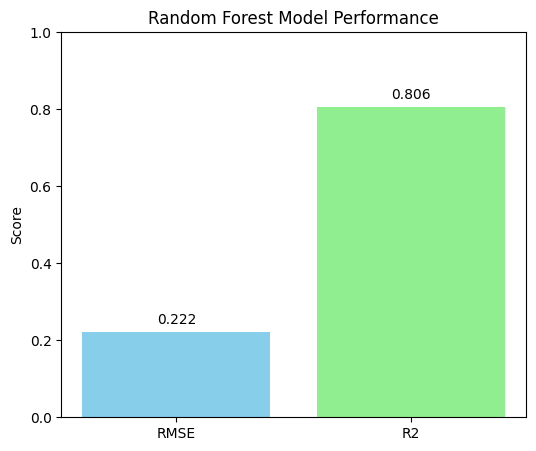

In [16]:
metrics = ['RMSE', 'R2']
scores = [rf_rmse, rf_r2]
plt.figure(figsize=(6, 5))
plt.bar(metrics, scores, color=['skyblue', 'lightgreen'])

plt.ylabel("Score")
plt.title("Random Forest Model Performance")
plt.ylim([0, 1])

for index, value in enumerate(scores):
    plt.text(index, value + 0.02, f'{value:.3f}', ha='center')

plt.show()

With these results, the Random Forest Regressor model has a high R2 value that represents the that the model fit to the data very well. This model also has a low RMSE score meaning that the model made accurate predictions.